<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-3-_part_a_b_c.ipynb/blob/main/Jocelyn_Baduria_Assignment_3_part_b1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B1. Pytorch
No auto differentiation 

In [170]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [171]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [172]:
!pip3 install torch torchvision

In [173]:
import torch
import torch.nn as nn
import numpy as np


%matplotlib inline
torch.set_printoptions(edgeitems=2, linewidth=75)

1. Generate data: 3 dimensions input and 2 dimensions output 

In [202]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons

n_samples = 200
d1 = 3
d2 = 3
x = torch.FloatTensor(n_samples, d1).uniform_(-1,1)
y = torch.FloatTensor(n_samples, d2).uniform_(-1,1)
x_un = 0.1 * x
weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.5, 0.25])

# # y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = torch.mm(x ** 2, weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
# #x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


2. Add ReLu function to learn the non-linear data, we need non-linearities in our model but didn't use it (no auto-differentiation)

In [269]:
# In order to learn non-linear functions, we need non-linearities in our model.

relu = nn.ReLU()
input = torch.randn(10).unsqueeze(-1)
output = torch.cat((m(input),m(-input)))

print(m(input))

tensor([[0.0000],
        [1.4549],
        [0.4725],
        [0.6227],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.2479],
        [0.0000]])


In [270]:
def model(x, weights_true, bias_true):
  return weights_true * x + bias_true

def loss_fn(t_p, y):
  squared_diffs = (t_p - y)**2
  return squared_diffs.mean()

3. Train the 3dim and 2output generated data using Pytorch

In [271]:
def model(x, weights_true, bias_true):
    return weights_true * x + bias_true

In [272]:
def loss_fn(t_p, y):
    squared_diffs = (t_p - y)**2
    return squared_diffs.mean()

In [257]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [258]:
params = torch.tensor([1.0, 0.0], requires_grad=False) # No autodifferentiation
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

params 

def training_loop(n_epochs, optimizer, params, x, y):
    for epoch in range(1, n_epochs + 1):
        t_p = model(x, *params) 
        loss = loss_fn(t_p, y)
        
        optimizer.zero_grad()
        # loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [265]:
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    x = x_un,
    y = y)

Epoch 500, Loss 0.335889
Epoch 1000, Loss 0.335889
Epoch 1500, Loss 0.335889
Epoch 2000, Loss 0.335889
Epoch 2500, Loss 0.335889
Epoch 3000, Loss 0.335889
Epoch 3500, Loss 0.335889
Epoch 4000, Loss 0.335889
Epoch 4500, Loss 0.335889
Epoch 5000, Loss 0.335889


tensor([1., 0.])

4. Fit the model and compute the cost function using Pytorch


In [266]:
# Now we run the training loop

params = torch.tensor([1.0, 0.0], requires_grad=False)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

y_pred = model(x_un, *params)
loss = loss_fn(y_pred, y)

optimizer.zero_grad() # <1>
# loss.backward()
optimizer.step()

params

tensor([1., 0.])

In [267]:
# Now we run the training loop
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x_un, *params)
    optimizer.step()

torch_fit(x, y, model=model, loss=loss, lr=0.1, num_epochs=40)

6. Plot the output post training as well as the real data  using tsne. Result: Similar plots but different values

In [268]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

view = TSNE(n_components=2, perplexity=2,learning_rate=200,random_state=123).fit_transform(x, t_p)
view.shape

def plot_tsne(x, y, t_p):
  plt.figure(figsize=(10,5))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  plt.legend()

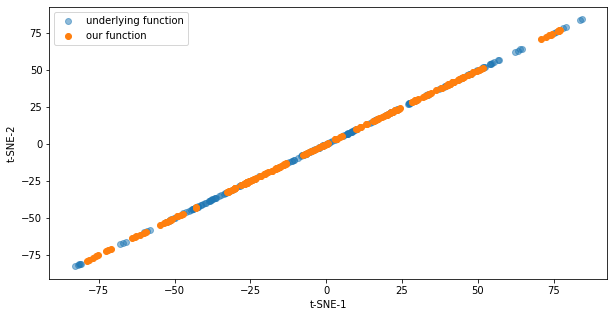

In [187]:
plot_tsne(x, y, t_p)